In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import brier_score_loss
import ast
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance

In [4]:
datasets1 = []
for i in range(1, 11):
    df = pd.read_csv(f'../train/{i:05d}/train_stage1.csv')
    df['target_vector'] = df['target_vector'].apply(ast.literal_eval) 
    
    # target_vector max to 1 other to 0
    def set_max_to_one(target_list):
        max_value = max(target_list)
        return [1 if value == max_value else 0 for value in target_list]
    
    target_df = pd.DataFrame(df['target_vector'].apply(set_max_to_one).tolist(), index=df.index)
    features_df = df.drop(columns=['target_vector'])
    datasets1.append((features_df, target_df))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

brier_scores1 = []
model_importance1 = []
counter1 = 1

for train_index, test_index in kf.split(datasets1):
    X_train = pd.concat([datasets1[i][0] for i in train_index], ignore_index=True)
    y_train = pd.concat([datasets1[i][1] for i in train_index], ignore_index=True)
    
    X_test = pd.concat([datasets1[i][0] for i in test_index], ignore_index=True)
    y_test = pd.concat([datasets1[i][1] for i in test_index], ignore_index=True)
    
    model = make_pipeline(
        SimpleImputer(strategy='constant', fill_value=0),  
        MultiOutputClassifier(KNeighborsClassifier(n_neighbors=20))
    )
    model.fit(X_train, y_train)

    model_importance1.append(permutation_importance(model, X_test, y_test, n_repeats=10,random_state=42))
    
  
    y_prob = model.predict_proba(X_test)

    brier_score = np.mean([brier_score_loss(y_test.iloc[:, c], y_prob[c][:, 1], pos_label=1) for c in range(y_test.shape[1])])
    print(f'Fit {counter1}: brier score = {brier_score}.')
    brier_scores1.append(brier_score)
    counter1 += 1

print(f'Average score across all folds: {np.mean(brier_scores1)}')

Fit 1: brier score = 0.04293616560877092.


In [25]:
importance_df1 = pd.DataFrame()
importance_df1['features'] = pd.read_csv('../train/00001/train_stage1.csv').drop('target_vector', axis=1).columns

counter1 = 1
for i in range(len(model_importance1)):
    col_name = 'fit '+str(counter1)
    importance_df1[col_name] = model_importance1[i].importances_mean
    counter1 += 1

importance_df1['mean'] = importance_df1.drop('features', axis=1).mean(axis=1)
importance_df1 = importance_df1.sort_values(by='mean')
importance_df1['mean'] = importance_df1['mean'] / importance_df1['mean'].sum()
importance_df1


,features,fit 1,fit 2,fit 3,fit 4,fit 5,mean
4,y_mean,-0.000115,-0.001241,0.000251,-0.001131,-0.002301,-0.006028
3,x_mean,-0.001385,-0.002228,0.002702,-0.000031,-0.000460,-0.001862
5,z_mean,0.000808,0.000095,0.001414,0.000611,-0.000427,0.003323
2,location_idx,0.021754,0.005315,0.022369,0.019016,0.015089,0.110987
0,start,0.093941,0.009835,0.112158,0.051177,0.069198,0.446790
1,end,0.093941,0.009835,0.112158,0.051177,0.069198,0.446790


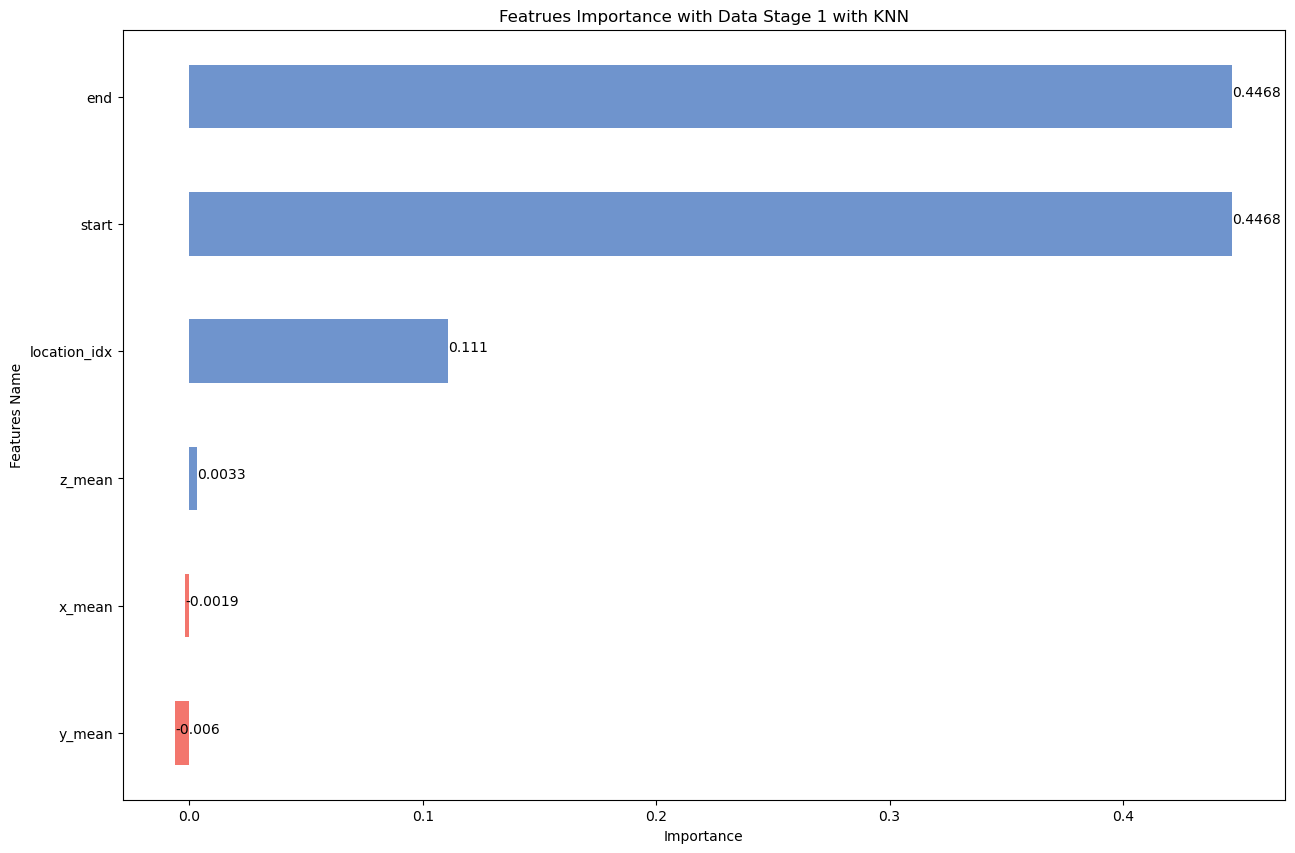

In [29]:
import matplotlib.pyplot as plt

colors = ['#f3766d' if v < 0 else '#6f94cd' for v in importance_df1['mean']]

fig, ax1 = plt.subplots(figsize=(15,10))

ax1.barh(importance_df1['features'], importance_df1['mean'], color=colors, height=0.5)
ax1.set_ylabel('Features Name')
ax1.set_xlabel('Importance')
ax1.set_title('Featrues Importance with Data Stage 1 with KNN')

for index, value in enumerate(importance_df1['mean']):
    ax1.text(value, index, str(round(value, ndigits=4)))

plt.show()

In [32]:
datasets2 = []
for i in range(1, 11):
    df = pd.read_csv(f'../train/{i:05d}/train_stage2.csv')
    df['target_vector'] = df['target_vector'].apply(ast.literal_eval) 
    
    # target_vector max to 1 other to 0
    def set_max_to_one(target_list):
        max_value = max(target_list)
        return [1 if value == max_value else 0 for value in target_list]
    
    target_df = pd.DataFrame(df['target_vector'].apply(set_max_to_one).tolist(), index=df.index)
    features_df = df.drop(columns=['target_vector'])
    datasets2.append((features_df, target_df))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

brier_scores2 = []
model_importance2 = []
counter2 = 1

for train_index, test_index in kf.split(datasets2):
    X_train = pd.concat([datasets2[i][0] for i in train_index], ignore_index=True)
    y_train = pd.concat([datasets2[i][1] for i in train_index], ignore_index=True)
    
    X_test = pd.concat([datasets2[i][0] for i in test_index], ignore_index=True)
    y_test = pd.concat([datasets2[i][1] for i in test_index], ignore_index=True)
    
    model = make_pipeline(
        SimpleImputer(strategy='constant', fill_value=0),  
        MultiOutputClassifier(KNeighborsClassifier(n_neighbors=20))
    )
    model.fit(X_train, y_train)

    model_importance2.append(permutation_importance(model, X_test, y_test, n_repeats=10,random_state=42))
    
  
    y_prob = model.predict_proba(X_test)

    brier_score = np.mean([brier_score_loss(y_test.iloc[:, c], y_prob[c][:, 1], pos_label=1) for c in range(y_test.shape[1])])
    print(f'Fit {counter1}: brier score = {brier_score}.')
    brier_scores2.append(brier_score)
    counter2 += 1

print(f'Average score across all folds: {np.mean(brier_scores2)}')

Fit 6: brier score = 0.03601608482400461.
Fit 6: brier score = 0.03477522278803309.
Fit 6: brier score = 0.03358459000942507.
Fit 6: brier score = 0.03361319168450016.
Fit 6: brier score = 0.03249087771203155.
Average score across all folds: 0.034095993403598895


In [57]:
importance_df2 = pd.DataFrame()
importance_df2['features'] = pd.read_csv('../train/00001/train_stage2.csv').drop('target_vector', axis=1).columns

counter2 = 1
for i in range(0,5):
    col_name = 'fit '+str(counter2)
    importance_df2[col_name] = model_importance2[i].importances_mean
    counter2 += 1

importance_df2['mean'] = importance_df2.drop('features', axis=1).mean(axis=1)
importance_df2 = importance_df2.sort_values(by='mean')
importance_df2['mean'] = importance_df2['mean'] / importance_df2['mean'].sum()
importance_df2


,features,fit 1,fit 2,fit 3,fit 4,fit 5,mean
8,2d_movement_mean_y,0.000433,-1.400382e-03,-0.000817,0.000734,0.000099,-0.000374
15,3d_movement_std_y,0.000115,-3.182686e-04,-0.001162,0.000153,0.000296,-0.000360
7,2d_movement_mean_x,0.000664,-2.005092e-03,-0.000377,0.001223,-0.000394,-0.000349
34,x_min_value,-0.000260,-2.227880e-04,-0.000377,0.000397,0.000263,-0.000078
31,x_median,-0.000260,-6.365372e-05,-0.000377,0.000397,0.000230,-0.000029
9,2d_movement_std_x,-0.000029,0.000000e+00,0.000000,0.000000,0.000000,-0.000011
46,z_std_dev,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
43,z_average_jerk,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
39,y_std_dev,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
36,y_average_jerk,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000


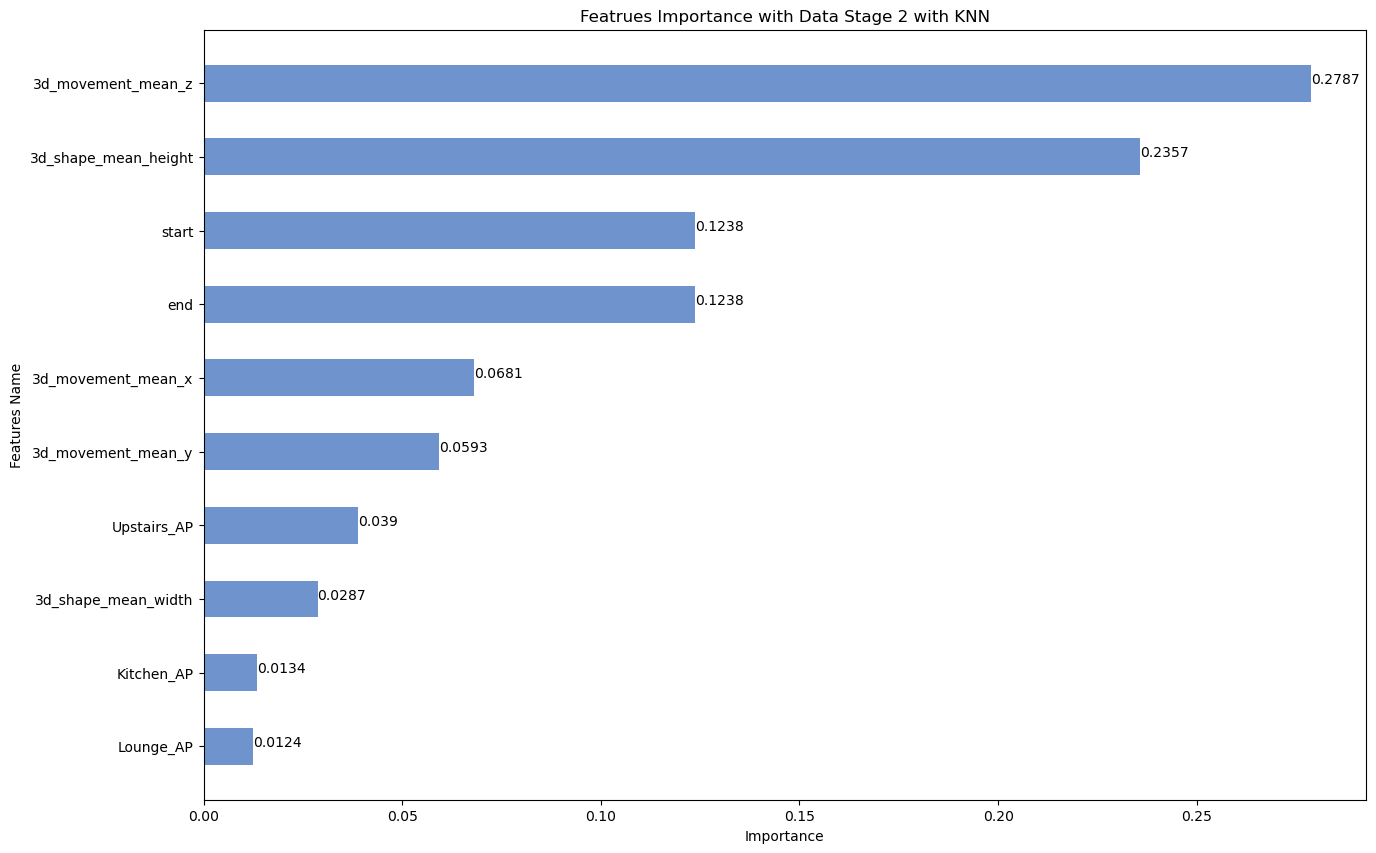

In [41]:
import matplotlib.pyplot as plt

colors = ['#f3766d' if v < 0 else '#6f94cd' for v in importance_df2['mean'].tail(10)]

fig, ax2 = plt.subplots(figsize=(15,10))

ax2.barh(importance_df2['features'].tail(10), importance_df2['mean'].tail(10), color=colors, height=0.5)
ax2.set_ylabel('Features Name')
ax2.set_xlabel('Importance')
ax2.set_title('Featrues Importance with Data Stage 2 with KNN')

for index, value in enumerate(importance_df2['mean'].tail(10)):
    ax2.text(value, index, str(round(value, 4)))

plt.show()

In [35]:
datasets3 = []
for i in range(1, 11):
    df = pd.read_csv(f'../train/{i:05d}/train_stage3.csv')
    df['target_vector'] = df['target_vector'].apply(ast.literal_eval) 
    
    # target_vector max to 1 other to 0
    def set_max_to_one(target_list):
        max_value = max(target_list)
        return [1 if value == max_value else 0 for value in target_list]
    
    target_df = pd.DataFrame(df['target_vector'].apply(set_max_to_one).tolist(), index=df.index)
    features_df = df.drop(columns=['target_vector'])
    datasets3.append((features_df, target_df))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

brier_scores3 = []
model_importance3 = []
counter3 = 1

for train_index, test_index in kf.split(datasets3):
    X_train = pd.concat([datasets3[i][0] for i in train_index], ignore_index=True)
    y_train = pd.concat([datasets3[i][1] for i in train_index], ignore_index=True)
    
    X_test = pd.concat([datasets3[i][0] for i in test_index], ignore_index=True)
    y_test = pd.concat([datasets3[i][1] for i in test_index], ignore_index=True)
    
    model = make_pipeline(
        SimpleImputer(strategy='constant', fill_value=0),  
        MultiOutputClassifier(KNeighborsClassifier(n_neighbors=20))
    )
    model.fit(X_train, y_train)

    model_importance2.append(permutation_importance(model, X_test, y_test, n_repeats=10,random_state=42))
    
  
    y_prob = model.predict_proba(X_test)

    brier_score = np.mean([brier_score_loss(y_test.iloc[:, c], y_prob[c][:, 1], pos_label=1) for c in range(y_test.shape[1])])
    print(f'Fit {counter1}: brier score = {brier_score}.')
    brier_scores3.append(brier_score)
    counter3 += 1

print(f'Average score across all folds: {np.mean(brier_scores3)}')

Fit 6: brier score = 0.04260159405654934.
Fit 6: brier score = 0.0450187380649268.
Fit 6: brier score = 0.04000290606346215.
Fit 6: brier score = 0.042178118312442676.
Fit 6: brier score = 0.043294789612097304.
Average score across all folds: 0.04261922922189565


In [51]:
importance_df3 = pd.DataFrame()
importance_df3['features'] = pd.read_csv('../train/00001/train_stage3.csv').drop('target_vector', axis=1).columns

counter3 = 1
for i in range(5,10):
    print(i)
    col_name = 'fit '+str(counter3)
    importance_df3[col_name] = model_importance2[i].importances_mean
    counter3 += 1

importance_df3['mean'] = importance_df3.drop('features', axis=1).mean(axis=1)
importance_df3 = importance_df3.sort_values(by='mean')
importance_df3['mean'] = importance_df3['mean'] / importance_df3['mean'].sum()
importance_df3


5
6
7
8
9


,features,fit 1,fit 2,fit 3,fit 4,fit 5,mean
11,3d_movement_mean_x,6.635892e-04,3.182686e-04,-0.002545,-6.114338e-04,0.000756,-0.001838
7,2d_movement_mean_x,3.173687e-04,3.500955e-04,-0.002482,-3.362886e-04,0.000920,-0.001595
44,z_median,8.655511e-05,1.591343e-04,-0.000628,-8.865790e-04,0.000197,-0.001389
21,3d_shape_mean_width,3.462204e-04,-7.320178e-04,-0.000817,-2.751452e-04,0.000855,-0.000808
51,yz_corr,5.770340e-04,9.548059e-05,-0.001791,3.057169e-04,0.000263,-0.000712
24,3d_shape_std_height,5.770340e-05,-2.546149e-04,0.000094,6.114338e-05,-0.000230,-0.000352
36,y_average_absolute_value,8.655511e-05,-1.909612e-04,0.000157,-6.725772e-04,0.000362,-0.000335
20,2d_shape_std_height,5.770340e-05,-1.273074e-04,0.000000,6.114338e-05,-0.000230,-0.000309
26,y_mean,9.232545e-04,-1.273074e-04,-0.001979,3.668603e-04,0.000657,-0.000206
31,x_std_dev,3.173687e-04,-2.864418e-04,-0.000377,-3.057169e-05,0.000296,-0.000105


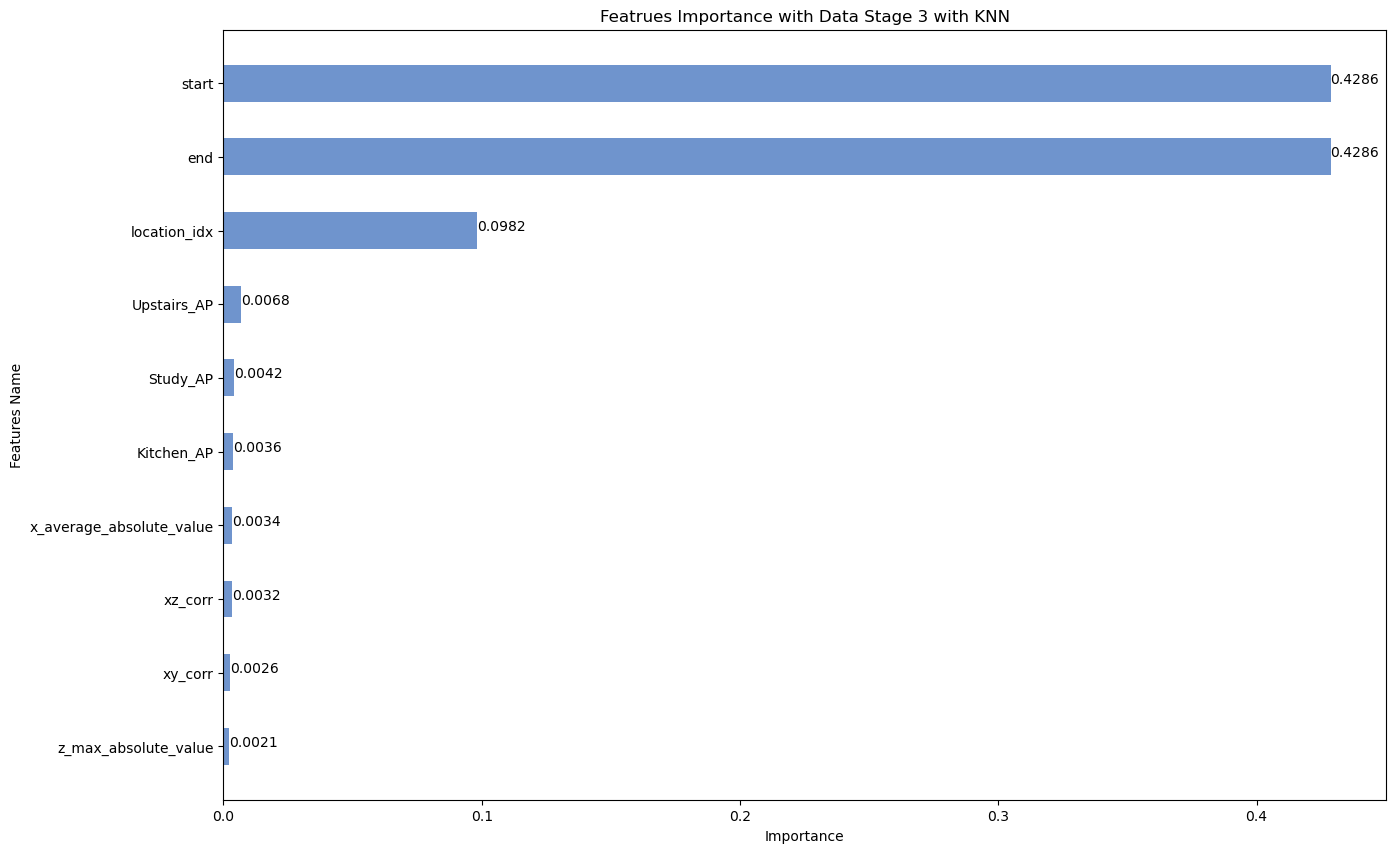

In [47]:
import matplotlib.pyplot as plt

colors = ['#f3766d' if v < 0 else '#6f94cd' for v in importance_df3['mean'].tail(10)]

fig, ax3 = plt.subplots(figsize=(15,10))

ax3.barh(importance_df3['features'].tail(10), importance_df3['mean'].tail(10), color=colors, height=0.5)
ax3.set_ylabel('Features Name')
ax3.set_xlabel('Importance')
ax3.set_title('Featrues Importance with Data Stage 3 with KNN')

for index, value in enumerate(importance_df3['mean'].tail(10)):
    ax3.text(value, index, str(round(value, ndigits=4)))

plt.show()

In [50]:
for i in range(len(model_importance2)):
    print(i, len(model_importance2[i].importances_mean))



0 53
1 53
2 53
3 53
4 53
5 52
6 52
7 52
8 52
9 52
